# Boston Housing Example
The Boston Housing data set was analyzed by Harrison and Rubinfeld (1978) who wanted to find out whether clean air had an influence on house prices. We will use this data set in this example and in most of the following examples to illustrate the presented methodology. You can find the dataset here: https://archive.ics.uci.edu/ml/datasets/Housing.

In [1]:
import numpy as np
from sklearn.datasets import load_boston
from miniflow.layers import Input, Linear, Sigmoid, Variable
from miniflow.topology import Model
from sklearn.model_selection import train_test_split

The dataset concerns housing values in suburbs of Boston. The features are:
1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per `$10,000`
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in $1000's

## Pre-processing

In [2]:
# Load dataset
data = load_boston()
X = data['data']
y = data['target']
print("Shapes X: {} y:{}".format(X.shape, y.shape))
print(X[0], '=', y[0])

Shapes X: (506, 13) y:(506,)
[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00] = 24.0


In [3]:
# Let's start normalizing the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
print(X[0])

[-0.41771335  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
 -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038  0.44105193
 -1.0755623 ]


In [4]:
# Finally, split between train/test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("Shapes X_train: {} y_train:{} X_test:{} y_test:{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Shapes X_train: (404, 13) y_train:(404,) X_test:(102, 13) y_test:(102,)


## Simple Network Topology

In [28]:
# Configuration
n_features = X_train.shape[1]
n_hidden = 100

# Layers Initialization Weights:
#W1 = np.random.randn(n_features, n_hidden)
W1 = np.random.normal(0, 0.1, (n_features, n_hidden))
b1 = np.zeros(n_hidden)
#W2 = np.random.randn(n_hidden, 1)
W2 = np.random.normal(0, 0.1, (n_hidden, 1))
b2 = np.zeros(1)

# Neural network inputs (X and y):
Xi = Input(name="X_input")
yi = Input(name="y_input")

# Neural Network trainable parameter:
W1i, b1i = Variable(name="W1"), Variable(name="b1")
W2i, b2i = Variable(name="W2"), Variable(name="b2")

# Topology
Xi = Input()
x = Linear(W1i, b1i)(Xi)
x = Sigmoid()(x)
x = Linear(W2i, b2i)(x)

## Training

In [29]:
# Define the base Model object
model = Model(inputs=[Xi], outputs=[x])
# Compile the model setting the loss funciton: Mean Square Error
model.compile(loss='mse')
# Train the model getting the history data:
history = model.train(X_train, y_train, X_test=X_test, y_test=y_test, epochs=100, batch_size=64, feed_dict={
    W1i: W1,
    b1i: b1,
    W2i: W2,
    b2i: b2
})

Epoch 1: 
Train Loss: 2190.140 - Test Loss: 2377.192
Epoch 2: 
Train Loss: 485.036 - Test Loss: 158.703
Epoch 3: 
Train Loss: 56.522 - Test Loss: 68.645
Epoch 4: 
Train Loss: 38.566 - Test Loss: 52.126
Epoch 5: 
Train Loss: 24.373 - Test Loss: 47.460
Epoch 6: 
Train Loss: 24.355 - Test Loss: 43.433
Epoch 7: 
Train Loss: 21.448 - Test Loss: 41.163
Epoch 8: 
Train Loss: 19.141 - Test Loss: 39.178
Epoch 9: 
Train Loss: 18.631 - Test Loss: 39.024
Epoch 10: 
Train Loss: 16.848 - Test Loss: 36.508
Epoch 11: 
Train Loss: 14.402 - Test Loss: 33.961
Epoch 12: 
Train Loss: 14.618 - Test Loss: 32.421
Epoch 13: 
Train Loss: 14.158 - Test Loss: 30.280
Epoch 14: 
Train Loss: 13.561 - Test Loss: 28.081
Epoch 15: 
Train Loss: 13.609 - Test Loss: 25.817
Epoch 16: 
Train Loss: 11.903 - Test Loss: 24.111
Epoch 17: 
Train Loss: 11.593 - Test Loss: 23.242
Epoch 18: 
Train Loss: 11.807 - Test Loss: 23.068
Epoch 19: 
Train Loss: 9.419 - Test Loss: 23.435
Epoch 20: 
Train Loss: 9.601 - Test Loss: 21.714
Epoch

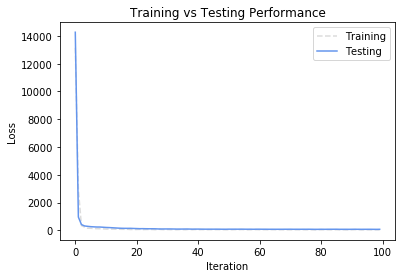

In [30]:
#
# Plot the training results
#
import matplotlib.pyplot as plt
plt.figure()
plt.title("Training vs Testing Performance")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt_train, = plt.plot(history['train_loss'], '--', color="gainsboro", label='Training')
plt_test, = plt.plot(history['test_loss'], color='cornflowerblue', label='Testing')
plt.legend(handles=[plt_train, plt_test])
plt.show()